# Training of original model
## Dataset: Intel

In [1]:
#pip install opencv-python tensorflow
import argparse

import numpy as np
import tensorflow as tf
import keras.backend as K

import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.regularizers import l2

import glob
import os
import cv2
import keras
import time1

from tqdm import tqdm

from keras.models import load_model, Model

In [3]:
num_categories = 6

def get_im(path):
    # Load as grayscale
    img = cv2.imread(path, 0)
    # Reduce size
    resized = cv2.resize(img, (img_width, img_height))
    return resized

def load_train():
    X_train = []
    y_train = []
    print('Read train images')
    for j in range(num_categories):
        print('Load folder c{}'.format(j))
        if(j<10):
            path = os.path.join('..', 'train', '0000' + str(j), '*.jpg')
        else:
            path = os.path.join('..', 'train', '000' + str(j), '*.jpg')
        files = glob.glob(path)
        print(files)
        for fl in files:
            print(fl)
            img = get_im(fl)
            X_train.append(img)
            y_train.append(j)

    return X_train, y_train

def load_test():
    X_test = []
    y_test = []
    print('Read test images')
    for j in range(num_categories):
        print('Load folder c{}'.format(j))
        if(j<10):
            path = os.path.join('..', 'test','0000' + str(j), '*.jpg')
        else:
            path = os.path.join('..', 'test', '000' + str(j), '*.jpg')
        print(path)
        files = glob.glob(path)
        print(files)
        for fl in files:
            print(fl)
            img = get_im(fl)
            X_test.append(img)
            y_test.append(j)

    return X_test, y_test

def load_val():
    X_val = []
    y_val = []
    print('Read test images')
    for j in range(num_categories):
        print('Load folder c{}'.format(j))
        if(j<10):
            path = os.path.join('..', 'val','0000' + str(j), '*.jpg')
        else:
            path = os.path.join('..', 'val', '000' + str(j), '*.jpg')
        print(path)
        files = glob.glob(path)
        print(files)
        for fl in files:
            print(fl)
            img = get_im(fl)
            X_val.append(img)
            y_val.append(j)

    return X_val, y_val

In [4]:
cd "C:/Users/fjdur/Desktop/upc/project_notebooks/github_project/data/intel_dataset/final_dataset/train"

C:\Users\fjdur\Desktop\upc\project_notebooks\github_project\data\intel_dataset\final_dataset\train


In [5]:
img_width = 48
img_height = 48
x_train, y_train = load_train()

Read train images
Load folder c0
['..\\train\\00000\\0.jpg', '..\\train\\00000\\10006.jpg', '..\\train\\00000\\10014.jpg', '..\\train\\00000\\10029.jpg', '..\\train\\00000\\10032.jpg', '..\\train\\00000\\1009.jpg', '..\\train\\00000\\10113.jpg', '..\\train\\00000\\1012.jpg', '..\\train\\00000\\10126.jpg', '..\\train\\00000\\10144.jpg', '..\\train\\00000\\10165.jpg', '..\\train\\00000\\10184.jpg', '..\\train\\00000\\10185.jpg', '..\\train\\00000\\10196.jpg', '..\\train\\00000\\10198.jpg', '..\\train\\00000\\10205.jpg', '..\\train\\00000\\10210.jpg', '..\\train\\00000\\10228.jpg', '..\\train\\00000\\10231.jpg', '..\\train\\00000\\10252.jpg', '..\\train\\00000\\10257.jpg', '..\\train\\00000\\10266.jpg', '..\\train\\00000\\1028.jpg', '..\\train\\00000\\10295.jpg', '..\\train\\00000\\10303.jpg', '..\\train\\00000\\10306.jpg', '..\\train\\00000\\10310.jpg', '..\\train\\00000\\10312.jpg', '..\\train\\00000\\10316.jpg', '..\\train\\00000\\10318.jpg', '..\\train\\00000\\10328.jpg', '..\\train\\

..\train\00000\10328.jpg
..\train\00000\10350.jpg
..\train\00000\10357.jpg
..\train\00000\10362.jpg
..\train\00000\10374.jpg
..\train\00000\10383.jpg
..\train\00000\10402.jpg
..\train\00000\10421.jpg
..\train\00000\10444.jpg
..\train\00000\1045.jpg
..\train\00000\10452.jpg
..\train\00000\10466.jpg
..\train\00000\10480.jpg
..\train\00000\10485.jpg
..\train\00000\10489.jpg
..\train\00000\10495.jpg
..\train\00000\10499.jpg
..\train\00000\10500.jpg
..\train\00000\10502.jpg
..\train\00000\10511.jpg
..\train\00000\10520.jpg
..\train\00000\10528.jpg
..\train\00000\1055.jpg
..\train\00000\10559.jpg
..\train\00000\10570.jpg
..\train\00000\10576.jpg
..\train\00000\1058.jpg
..\train\00000\10582.jpg
..\train\00000\10598.jpg
..\train\00000\10608.jpg
..\train\00000\10620.jpg
..\train\00000\10630.jpg
..\train\00000\1064.jpg
..\train\00000\10641.jpg
..\train\00000\10646.jpg
..\train\00000\10653.jpg
..\train\00000\10672.jpg
..\train\00000\10699.jpg
..\train\00000\10717.jpg
..\train\00000\10720.jpg
..\t

..\train\00000\13978.jpg
..\train\00000\13983.jpg
..\train\00000\14004.jpg
..\train\00000\14016.jpg
..\train\00000\14022.jpg
..\train\00000\1406.jpg
..\train\00000\14081.jpg
..\train\00000\14092.jpg
..\train\00000\14094.jpg
..\train\00000\14114.jpg
..\train\00000\14124.jpg
..\train\00000\1413.jpg
..\train\00000\14148.jpg
..\train\00000\1415.jpg
..\train\00000\14161.jpg
..\train\00000\14182.jpg
..\train\00000\14184.jpg
..\train\00000\14189.jpg
..\train\00000\14194.jpg
..\train\00000\142.jpg
..\train\00000\14205.jpg
..\train\00000\14212.jpg
..\train\00000\14218.jpg
..\train\00000\14246.jpg
..\train\00000\14247.jpg
..\train\00000\14261.jpg
..\train\00000\14294.jpg
..\train\00000\14297.jpg
..\train\00000\14300.jpg
..\train\00000\14318.jpg
..\train\00000\14321.jpg
..\train\00000\14365.jpg
..\train\00000\14372.jpg
..\train\00000\14383.jpg
..\train\00000\14389.jpg
..\train\00000\14410.jpg
..\train\00000\14416.jpg
..\train\00000\14434.jpg
..\train\00000\14439.jpg
..\train\00000\14447.jpg
..\tr

..\train\00000\17452.jpg
..\train\00000\17457.jpg
..\train\00000\17468.jpg
..\train\00000\17479.jpg
..\train\00000\17480.jpg
..\train\00000\17491.jpg
..\train\00000\17495.jpg
..\train\00000\17503.jpg
..\train\00000\1751.jpg
..\train\00000\17516.jpg
..\train\00000\1753.jpg
..\train\00000\17537.jpg
..\train\00000\17539.jpg
..\train\00000\17541.jpg
..\train\00000\17552.jpg
..\train\00000\17560.jpg
..\train\00000\17574.jpg
..\train\00000\17575.jpg
..\train\00000\17581.jpg
..\train\00000\17590.jpg
..\train\00000\17594.jpg
..\train\00000\1760.jpg
..\train\00000\17602.jpg
..\train\00000\17605.jpg
..\train\00000\17609.jpg
..\train\00000\1763.jpg
..\train\00000\17636.jpg
..\train\00000\17673.jpg
..\train\00000\17687.jpg
..\train\00000\17718.jpg
..\train\00000\17719.jpg
..\train\00000\17731.jpg
..\train\00000\17750.jpg
..\train\00000\17751.jpg
..\train\00000\17771.jpg
..\train\00000\17793.jpg
..\train\00000\17805.jpg
..\train\00000\17821.jpg
..\train\00000\17825.jpg
..\train\00000\17830.jpg
..\t

..\train\00000\3142.jpg
..\train\00000\3145.jpg
..\train\00000\315.jpg
..\train\00000\3151.jpg
..\train\00000\3170.jpg
..\train\00000\318.jpg
..\train\00000\3193.jpg
..\train\00000\3207.jpg
..\train\00000\3209.jpg
..\train\00000\321.jpg
..\train\00000\3216.jpg
..\train\00000\3253.jpg
..\train\00000\3255.jpg
..\train\00000\3257.jpg
..\train\00000\3297.jpg
..\train\00000\3310.jpg
..\train\00000\3323.jpg
..\train\00000\3328.jpg
..\train\00000\3336.jpg
..\train\00000\3339.jpg
..\train\00000\3359.jpg
..\train\00000\3364.jpg
..\train\00000\3387.jpg
..\train\00000\3391.jpg
..\train\00000\3395.jpg
..\train\00000\3397.jpg
..\train\00000\343.jpg
..\train\00000\3449.jpg
..\train\00000\3457.jpg
..\train\00000\3477.jpg
..\train\00000\3481.jpg
..\train\00000\3488.jpg
..\train\00000\3499.jpg
..\train\00000\3506.jpg
..\train\00000\3523.jpg
..\train\00000\3524.jpg
..\train\00000\3528.jpg
..\train\00000\3540.jpg
..\train\00000\3560.jpg
..\train\00000\3572.jpg
..\train\00000\3579.jpg
..\train\00000\3596.

..\train\00000\6954.jpg
..\train\00000\6956.jpg
..\train\00000\6958.jpg
..\train\00000\6959.jpg
..\train\00000\6961.jpg
..\train\00000\6970.jpg
..\train\00000\6983.jpg
..\train\00000\7024.jpg
..\train\00000\703.jpg
..\train\00000\7035.jpg
..\train\00000\7065.jpg
..\train\00000\7071.jpg
..\train\00000\7076.jpg
..\train\00000\7084.jpg
..\train\00000\7091.jpg
..\train\00000\7108.jpg
..\train\00000\7114.jpg
..\train\00000\7118.jpg
..\train\00000\7138.jpg
..\train\00000\7143.jpg
..\train\00000\7151.jpg
..\train\00000\7171.jpg
..\train\00000\7185.jpg
..\train\00000\721.jpg
..\train\00000\7214.jpg
..\train\00000\7222.jpg
..\train\00000\7227.jpg
..\train\00000\7229.jpg
..\train\00000\7235.jpg
..\train\00000\7237.jpg
..\train\00000\7241.jpg
..\train\00000\7258.jpg
..\train\00000\726.jpg
..\train\00000\727.jpg
..\train\00000\7277.jpg
..\train\00000\7282.jpg
..\train\00000\7287.jpg
..\train\00000\7291.jpg
..\train\00000\7292.jpg
..\train\00000\7308.jpg
..\train\00000\7311.jpg
..\train\00000\7321.

..\train\00001\10142.jpg
..\train\00001\10145.jpg
..\train\00001\10146.jpg
..\train\00001\10153.jpg
..\train\00001\10154.jpg
..\train\00001\10155.jpg
..\train\00001\10180.jpg
..\train\00001\10186.jpg
..\train\00001\10197.jpg
..\train\00001\10207.jpg
..\train\00001\10217.jpg
..\train\00001\10223.jpg
..\train\00001\10235.jpg
..\train\00001\10239.jpg
..\train\00001\1024.jpg
..\train\00001\10240.jpg
..\train\00001\10242.jpg
..\train\00001\1025.jpg
..\train\00001\10258.jpg
..\train\00001\10263.jpg
..\train\00001\10275.jpg
..\train\00001\10281.jpg
..\train\00001\10283.jpg
..\train\00001\10285.jpg
..\train\00001\10294.jpg
..\train\00001\10320.jpg
..\train\00001\10325.jpg
..\train\00001\1034.jpg
..\train\00001\10341.jpg
..\train\00001\10346.jpg
..\train\00001\10347.jpg
..\train\00001\10359.jpg
..\train\00001\10368.jpg
..\train\00001\10370.jpg
..\train\00001\10376.jpg
..\train\00001\10379.jpg
..\train\00001\10394.jpg
..\train\00001\10411.jpg
..\train\00001\10417.jpg
..\train\00001\10441.jpg
..\

..\train\00001\13388.jpg
..\train\00001\13423.jpg
..\train\00001\13444.jpg
..\train\00001\13449.jpg
..\train\00001\13487.jpg
..\train\00001\13493.jpg
..\train\00001\13499.jpg
..\train\00001\13503.jpg
..\train\00001\13508.jpg
..\train\00001\13516.jpg
..\train\00001\13519.jpg
..\train\00001\13532.jpg
..\train\00001\13551.jpg
..\train\00001\13570.jpg
..\train\00001\13572.jpg
..\train\00001\13582.jpg
..\train\00001\13592.jpg
..\train\00001\13596.jpg
..\train\00001\13623.jpg
..\train\00001\13626.jpg
..\train\00001\13630.jpg
..\train\00001\13637.jpg
..\train\00001\13666.jpg
..\train\00001\1369.jpg
..\train\00001\13703.jpg
..\train\00001\1372.jpg
..\train\00001\13723.jpg
..\train\00001\13726.jpg
..\train\00001\13733.jpg
..\train\00001\13748.jpg
..\train\00001\13759.jpg
..\train\00001\13765.jpg
..\train\00001\13767.jpg
..\train\00001\13769.jpg
..\train\00001\13789.jpg
..\train\00001\13798.jpg
..\train\00001\13809.jpg
..\train\00001\13819.jpg
..\train\00001\13826.jpg
..\train\00001\13833.jpg
..

..\train\00001\16929.jpg
..\train\00001\16949.jpg
..\train\00001\16951.jpg
..\train\00001\16975.jpg
..\train\00001\16977.jpg
..\train\00001\16980.jpg
..\train\00001\16990.jpg
..\train\00001\16998.jpg
..\train\00001\170.jpg
..\train\00001\17002.jpg
..\train\00001\17011.jpg
..\train\00001\17022.jpg
..\train\00001\17029.jpg
..\train\00001\17034.jpg
..\train\00001\1705.jpg
..\train\00001\17051.jpg
..\train\00001\17067.jpg
..\train\00001\17107.jpg
..\train\00001\17113.jpg
..\train\00001\17126.jpg
..\train\00001\17141.jpg
..\train\00001\17143.jpg
..\train\00001\17144.jpg
..\train\00001\17149.jpg
..\train\00001\17170.jpg
..\train\00001\17171.jpg
..\train\00001\17174.jpg
..\train\00001\17179.jpg
..\train\00001\17180.jpg
..\train\00001\1720.jpg
..\train\00001\17205.jpg
..\train\00001\17207.jpg
..\train\00001\17214.jpg
..\train\00001\17217.jpg
..\train\00001\17228.jpg
..\train\00001\17238.jpg
..\train\00001\17239.jpg
..\train\00001\17263.jpg
..\train\00001\1728.jpg
..\train\00001\17284.jpg
..\tr

..\train\00001\2335.jpg
..\train\00001\2339.jpg
..\train\00001\2345.jpg
..\train\00001\2357.jpg
..\train\00001\236.jpg
..\train\00001\2360.jpg
..\train\00001\2380.jpg
..\train\00001\2381.jpg
..\train\00001\2392.jpg
..\train\00001\2399.jpg
..\train\00001\240.jpg
..\train\00001\2410.jpg
..\train\00001\2445.jpg
..\train\00001\2457.jpg
..\train\00001\2465.jpg
..\train\00001\2468.jpg
..\train\00001\2497.jpg
..\train\00001\2504.jpg
..\train\00001\2512.jpg
..\train\00001\2520.jpg
..\train\00001\2526.jpg
..\train\00001\2535.jpg
..\train\00001\2537.jpg
..\train\00001\257.jpg
..\train\00001\2581.jpg
..\train\00001\2582.jpg
..\train\00001\2591.jpg
..\train\00001\2599.jpg
..\train\00001\2600.jpg
..\train\00001\2601.jpg
..\train\00001\2613.jpg
..\train\00001\2626.jpg
..\train\00001\2655.jpg
..\train\00001\2658.jpg
..\train\00001\2661.jpg
..\train\00001\267.jpg
..\train\00001\2674.jpg
..\train\00001\2676.jpg
..\train\00001\269.jpg
..\train\00001\270.jpg
..\train\00001\2744.jpg
..\train\00001\277.jpg

..\train\00001\5944.jpg
..\train\00001\5950.jpg
..\train\00001\597.jpg
..\train\00001\5973.jpg
..\train\00001\5988.jpg
..\train\00001\5992.jpg
..\train\00001\6004.jpg
..\train\00001\6016.jpg
..\train\00001\6021.jpg
..\train\00001\6040.jpg
..\train\00001\6042.jpg
..\train\00001\6049.jpg
..\train\00001\6065.jpg
..\train\00001\6085.jpg
..\train\00001\6086.jpg
..\train\00001\6098.jpg
..\train\00001\6099.jpg
..\train\00001\6104.jpg
..\train\00001\6106.jpg
..\train\00001\6112.jpg
..\train\00001\6127.jpg
..\train\00001\6137.jpg
..\train\00001\6153.jpg
..\train\00001\6154.jpg
..\train\00001\6161.jpg
..\train\00001\6169.jpg
..\train\00001\6188.jpg
..\train\00001\6196.jpg
..\train\00001\6223.jpg
..\train\00001\6252.jpg
..\train\00001\6258.jpg
..\train\00001\628.jpg
..\train\00001\6287.jpg
..\train\00001\6310.jpg
..\train\00001\6317.jpg
..\train\00001\6324.jpg
..\train\00001\6341.jpg
..\train\00001\6366.jpg
..\train\00001\6380.jpg
..\train\00001\6389.jpg
..\train\00001\6441.jpg
..\train\00001\645

..\train\00001\9663.jpg
..\train\00001\9670.jpg
..\train\00001\9696.jpg
..\train\00001\9718.jpg
..\train\00001\9740.jpg
..\train\00001\9741.jpg
..\train\00001\9751.jpg
..\train\00001\978.jpg
..\train\00001\9781.jpg
..\train\00001\9784.jpg
..\train\00001\980.jpg
..\train\00001\9800.jpg
..\train\00001\9808.jpg
..\train\00001\9814.jpg
..\train\00001\9838.jpg
..\train\00001\9848.jpg
..\train\00001\9852.jpg
..\train\00001\9874.jpg
..\train\00001\9880.jpg
..\train\00001\9883.jpg
..\train\00001\9904.jpg
..\train\00001\9910.jpg
..\train\00001\9912.jpg
..\train\00001\9923.jpg
..\train\00001\9944.jpg
..\train\00001\9964.jpg
..\train\00001\997.jpg
..\train\00001\9970.jpg
..\train\00001\9979.jpg
Load folder c2
['..\\train\\00002\\100.jpg', '..\\train\\00002\\10011.jpg', '..\\train\\00002\\1002.jpg', '..\\train\\00002\\10024.jpg', '..\\train\\00002\\10025.jpg', '..\\train\\00002\\10055.jpg', '..\\train\\00002\\10064.jpg', '..\\train\\00002\\10077.jpg', '..\\train\\00002\\10094.jpg', '..\\train\\000

..\train\00002\10234.jpg
..\train\00002\10267.jpg
..\train\00002\10289.jpg
..\train\00002\10291.jpg
..\train\00002\10298.jpg
..\train\00002\10301.jpg
..\train\00002\10326.jpg
..\train\00002\10327.jpg
..\train\00002\10355.jpg
..\train\00002\10365.jpg
..\train\00002\10372.jpg
..\train\00002\10385.jpg
..\train\00002\10389.jpg
..\train\00002\10403.jpg
..\train\00002\10404.jpg
..\train\00002\10422.jpg
..\train\00002\10432.jpg
..\train\00002\1044.jpg
..\train\00002\10446.jpg
..\train\00002\10455.jpg
..\train\00002\10467.jpg
..\train\00002\10468.jpg
..\train\00002\10476.jpg
..\train\00002\10487.jpg
..\train\00002\10488.jpg
..\train\00002\10491.jpg
..\train\00002\105.jpg
..\train\00002\10505.jpg
..\train\00002\10508.jpg
..\train\00002\10509.jpg
..\train\00002\10536.jpg
..\train\00002\10539.jpg
..\train\00002\10562.jpg
..\train\00002\10567.jpg
..\train\00002\1057.jpg
..\train\00002\10589.jpg
..\train\00002\10592.jpg
..\train\00002\10606.jpg
..\train\00002\10616.jpg
..\train\00002\1062.jpg
..\tr

..\train\00002\13420.jpg
..\train\00002\13421.jpg
..\train\00002\13422.jpg
..\train\00002\13427.jpg
..\train\00002\13429.jpg
..\train\00002\13440.jpg
..\train\00002\1346.jpg
..\train\00002\13483.jpg
..\train\00002\13504.jpg
..\train\00002\13515.jpg
..\train\00002\13521.jpg
..\train\00002\13525.jpg
..\train\00002\13527.jpg
..\train\00002\13575.jpg
..\train\00002\1358.jpg
..\train\00002\13593.jpg
..\train\00002\13597.jpg
..\train\00002\13602.jpg
..\train\00002\13625.jpg
..\train\00002\13631.jpg
..\train\00002\13635.jpg
..\train\00002\13644.jpg
..\train\00002\13651.jpg
..\train\00002\13652.jpg
..\train\00002\13667.jpg
..\train\00002\13677.jpg
..\train\00002\13678.jpg
..\train\00002\13691.jpg
..\train\00002\13700.jpg
..\train\00002\13701.jpg
..\train\00002\13706.jpg
..\train\00002\13709.jpg
..\train\00002\13722.jpg
..\train\00002\13725.jpg
..\train\00002\13729.jpg
..\train\00002\1373.jpg
..\train\00002\13742.jpg
..\train\00002\13743.jpg
..\train\00002\13749.jpg
..\train\00002\13764.jpg
..\

..\train\00002\16620.jpg
..\train\00002\16642.jpg
..\train\00002\16651.jpg
..\train\00002\16654.jpg
..\train\00002\16668.jpg
..\train\00002\1667.jpg
..\train\00002\16670.jpg
..\train\00002\1669.jpg
..\train\00002\16694.jpg
..\train\00002\16705.jpg
..\train\00002\16707.jpg
..\train\00002\16710.jpg
..\train\00002\16715.jpg
..\train\00002\16716.jpg
..\train\00002\1672.jpg
..\train\00002\16721.jpg
..\train\00002\16739.jpg
..\train\00002\16741.jpg
..\train\00002\1676.jpg
..\train\00002\16771.jpg
..\train\00002\16797.jpg
..\train\00002\16824.jpg
..\train\00002\16827.jpg
..\train\00002\16845.jpg
..\train\00002\16852.jpg
..\train\00002\16856.jpg
..\train\00002\16876.jpg
..\train\00002\16895.jpg
..\train\00002\16898.jpg
..\train\00002\1691.jpg
..\train\00002\16938.jpg
..\train\00002\16942.jpg
..\train\00002\16943.jpg
..\train\00002\16956.jpg
..\train\00002\16969.jpg
..\train\00002\16992.jpg
..\train\00002\17001.jpg
..\train\00002\17007.jpg
..\train\00002\17017.jpg
..\train\00002\17028.jpg
..\tr

..\train\00002\19825.jpg
..\train\00002\19828.jpg
..\train\00002\19834.jpg
..\train\00002\19835.jpg
..\train\00002\19844.jpg
..\train\00002\19883.jpg
..\train\00002\19894.jpg
..\train\00002\19900.jpg
..\train\00002\19904.jpg
..\train\00002\1991.jpg
..\train\00002\19920.jpg
..\train\00002\19921.jpg
..\train\00002\19925.jpg
..\train\00002\19926.jpg
..\train\00002\19934.jpg
..\train\00002\19958.jpg
..\train\00002\19975.jpg
..\train\00002\1998.jpg
..\train\00002\19985.jpg
..\train\00002\19988.jpg
..\train\00002\19990.jpg
..\train\00002\19993.jpg
..\train\00002\2000.jpg
..\train\00002\20002.jpg
..\train\00002\20007.jpg
..\train\00002\20016.jpg
..\train\00002\20018.jpg
..\train\00002\20028.jpg
..\train\00002\20040.jpg
..\train\00002\20045.jpg
..\train\00002\20046.jpg
..\train\00002\2010.jpg
..\train\00002\2056.jpg
..\train\00002\2072.jpg
..\train\00002\208.jpg
..\train\00002\2093.jpg
..\train\00002\2113.jpg
..\train\00002\2123.jpg
..\train\00002\2125.jpg
..\train\00002\214.jpg
..\train\00002

..\train\00002\5204.jpg
..\train\00002\5209.jpg
..\train\00002\5210.jpg
..\train\00002\5217.jpg
..\train\00002\5226.jpg
..\train\00002\523.jpg
..\train\00002\5237.jpg
..\train\00002\5240.jpg
..\train\00002\5268.jpg
..\train\00002\5273.jpg
..\train\00002\5275.jpg
..\train\00002\5286.jpg
..\train\00002\530.jpg
..\train\00002\5300.jpg
..\train\00002\5312.jpg
..\train\00002\5317.jpg
..\train\00002\5319.jpg
..\train\00002\5344.jpg
..\train\00002\5348.jpg
..\train\00002\5351.jpg
..\train\00002\5388.jpg
..\train\00002\54.jpg
..\train\00002\541.jpg
..\train\00002\5410.jpg
..\train\00002\5416.jpg
..\train\00002\542.jpg
..\train\00002\5425.jpg
..\train\00002\5435.jpg
..\train\00002\5439.jpg
..\train\00002\5442.jpg
..\train\00002\5465.jpg
..\train\00002\5468.jpg
..\train\00002\5474.jpg
..\train\00002\5492.jpg
..\train\00002\5494.jpg
..\train\00002\5495.jpg
..\train\00002\550.jpg
..\train\00002\551.jpg
..\train\00002\5510.jpg
..\train\00002\5526.jpg
..\train\00002\5530.jpg
..\train\00002\5539.jpg


..\train\00002\8585.jpg
..\train\00002\8590.jpg
..\train\00002\8606.jpg
..\train\00002\8608.jpg
..\train\00002\861.jpg
..\train\00002\8626.jpg
..\train\00002\8641.jpg
..\train\00002\865.jpg
..\train\00002\8662.jpg
..\train\00002\8691.jpg
..\train\00002\8693.jpg
..\train\00002\8698.jpg
..\train\00002\8714.jpg
..\train\00002\8735.jpg
..\train\00002\8741.jpg
..\train\00002\8756.jpg
..\train\00002\8793.jpg
..\train\00002\880.jpg
..\train\00002\8800.jpg
..\train\00002\8807.jpg
..\train\00002\8826.jpg
..\train\00002\8832.jpg
..\train\00002\8835.jpg
..\train\00002\8837.jpg
..\train\00002\8847.jpg
..\train\00002\8886.jpg
..\train\00002\8890.jpg
..\train\00002\8898.jpg
..\train\00002\8901.jpg
..\train\00002\891.jpg
..\train\00002\892.jpg
..\train\00002\8927.jpg
..\train\00002\893.jpg
..\train\00002\8942.jpg
..\train\00002\8954.jpg
..\train\00002\8982.jpg
..\train\00002\9033.jpg
..\train\00002\9034.jpg
..\train\00002\9044.jpg
..\train\00002\9054.jpg
..\train\00002\9055.jpg
..\train\00002\9091.jp

..\train\00003\10023.jpg
..\train\00003\10026.jpg
..\train\00003\10028.jpg
..\train\00003\10035.jpg
..\train\00003\10044.jpg
..\train\00003\10049.jpg
..\train\00003\1006.jpg
..\train\00003\10067.jpg
..\train\00003\10075.jpg
..\train\00003\10081.jpg
..\train\00003\10105.jpg
..\train\00003\10107.jpg
..\train\00003\10136.jpg
..\train\00003\10139.jpg
..\train\00003\10156.jpg
..\train\00003\10162.jpg
..\train\00003\10163.jpg
..\train\00003\10181.jpg
..\train\00003\1019.jpg
..\train\00003\10206.jpg
..\train\00003\10214.jpg
..\train\00003\10229.jpg
..\train\00003\10250.jpg
..\train\00003\10264.jpg
..\train\00003\10265.jpg
..\train\00003\10268.jpg
..\train\00003\1029.jpg
..\train\00003\10300.jpg
..\train\00003\10319.jpg
..\train\00003\1032.jpg
..\train\00003\10323.jpg
..\train\00003\10324.jpg
..\train\00003\10329.jpg
..\train\00003\10334.jpg
..\train\00003\10361.jpg
..\train\00003\10380.jpg
..\train\00003\10384.jpg
..\train\00003\10386.jpg
..\train\00003\10393.jpg
..\train\00003\10398.jpg
..\t

..\train\00003\13041.jpg
..\train\00003\13067.jpg
..\train\00003\13071.jpg
..\train\00003\1309.jpg
..\train\00003\13094.jpg
..\train\00003\13117.jpg
..\train\00003\13125.jpg
..\train\00003\13126.jpg
..\train\00003\13128.jpg
..\train\00003\13139.jpg
..\train\00003\1314.jpg
..\train\00003\13173.jpg
..\train\00003\13177.jpg
..\train\00003\13180.jpg
..\train\00003\13200.jpg
..\train\00003\13203.jpg
..\train\00003\13219.jpg
..\train\00003\13229.jpg
..\train\00003\13240.jpg
..\train\00003\13245.jpg
..\train\00003\13248.jpg
..\train\00003\13250.jpg
..\train\00003\13254.jpg
..\train\00003\1327.jpg
..\train\00003\13277.jpg
..\train\00003\13281.jpg
..\train\00003\13286.jpg
..\train\00003\13313.jpg
..\train\00003\13324.jpg
..\train\00003\13327.jpg
..\train\00003\13348.jpg
..\train\00003\13349.jpg
..\train\00003\13355.jpg
..\train\00003\1336.jpg
..\train\00003\13376.jpg
..\train\00003\13393.jpg
..\train\00003\13397.jpg
..\train\00003\1340.jpg
..\train\00003\13405.jpg
..\train\00003\13411.jpg
..\tr

..\train\00003\16164.jpg
..\train\00003\16168.jpg
..\train\00003\16173.jpg
..\train\00003\16179.jpg
..\train\00003\16180.jpg
..\train\00003\16203.jpg
..\train\00003\16207.jpg
..\train\00003\1621.jpg
..\train\00003\16222.jpg
..\train\00003\16225.jpg
..\train\00003\16227.jpg
..\train\00003\16236.jpg
..\train\00003\16237.jpg
..\train\00003\16244.jpg
..\train\00003\16245.jpg
..\train\00003\16246.jpg
..\train\00003\16248.jpg
..\train\00003\16252.jpg
..\train\00003\16257.jpg
..\train\00003\16278.jpg
..\train\00003\16281.jpg
..\train\00003\16286.jpg
..\train\00003\16295.jpg
..\train\00003\16312.jpg
..\train\00003\16322.jpg
..\train\00003\16350.jpg
..\train\00003\16354.jpg
..\train\00003\16358.jpg
..\train\00003\16359.jpg
..\train\00003\16371.jpg
..\train\00003\16375.jpg
..\train\00003\16381.jpg
..\train\00003\16383.jpg
..\train\00003\16388.jpg
..\train\00003\16409.jpg
..\train\00003\16417.jpg
..\train\00003\1642.jpg
..\train\00003\16421.jpg
..\train\00003\16435.jpg
..\train\00003\16438.jpg
..

..\train\00003\19173.jpg
..\train\00003\19186.jpg
..\train\00003\19193.jpg
..\train\00003\19207.jpg
..\train\00003\19214.jpg
..\train\00003\19237.jpg
..\train\00003\19240.jpg
..\train\00003\1925.jpg
..\train\00003\19250.jpg
..\train\00003\19251.jpg
..\train\00003\19266.jpg
..\train\00003\19268.jpg
..\train\00003\19270.jpg
..\train\00003\19276.jpg
..\train\00003\19281.jpg
..\train\00003\19290.jpg
..\train\00003\19295.jpg
..\train\00003\19307.jpg
..\train\00003\19329.jpg
..\train\00003\1933.jpg
..\train\00003\19354.jpg
..\train\00003\19358.jpg
..\train\00003\19387.jpg
..\train\00003\19388.jpg
..\train\00003\19391.jpg
..\train\00003\19399.jpg
..\train\00003\194.jpg
..\train\00003\19400.jpg
..\train\00003\19430.jpg
..\train\00003\19434.jpg
..\train\00003\19437.jpg
..\train\00003\19449.jpg
..\train\00003\19451.jpg
..\train\00003\19468.jpg
..\train\00003\19487.jpg
..\train\00003\19493.jpg
..\train\00003\19495.jpg
..\train\00003\19499.jpg
..\train\00003\19519.jpg
..\train\00003\19529.jpg
..\t

..\train\00003\4234.jpg
..\train\00003\4260.jpg
..\train\00003\4261.jpg
..\train\00003\4263.jpg
..\train\00003\4281.jpg
..\train\00003\4283.jpg
..\train\00003\4299.jpg
..\train\00003\4303.jpg
..\train\00003\4311.jpg
..\train\00003\4316.jpg
..\train\00003\4320.jpg
..\train\00003\4344.jpg
..\train\00003\4362.jpg
..\train\00003\4378.jpg
..\train\00003\4384.jpg
..\train\00003\4387.jpg
..\train\00003\4389.jpg
..\train\00003\439.jpg
..\train\00003\4390.jpg
..\train\00003\4414.jpg
..\train\00003\4470.jpg
..\train\00003\4483.jpg
..\train\00003\4501.jpg
..\train\00003\4508.jpg
..\train\00003\4513.jpg
..\train\00003\4516.jpg
..\train\00003\4522.jpg
..\train\00003\4539.jpg
..\train\00003\4541.jpg
..\train\00003\4554.jpg
..\train\00003\457.jpg
..\train\00003\4579.jpg
..\train\00003\459.jpg
..\train\00003\4601.jpg
..\train\00003\4602.jpg
..\train\00003\4624.jpg
..\train\00003\4638.jpg
..\train\00003\4644.jpg
..\train\00003\4672.jpg
..\train\00003\4673.jpg
..\train\00003\4676.jpg
..\train\00003\4682

..\train\00003\7209.jpg
..\train\00003\7226.jpg
..\train\00003\7247.jpg
..\train\00003\7248.jpg
..\train\00003\7252.jpg
..\train\00003\7255.jpg
..\train\00003\7268.jpg
..\train\00003\7278.jpg
..\train\00003\728.jpg
..\train\00003\7289.jpg
..\train\00003\729.jpg
..\train\00003\730.jpg
..\train\00003\7306.jpg
..\train\00003\7326.jpg
..\train\00003\7332.jpg
..\train\00003\7346.jpg
..\train\00003\7350.jpg
..\train\00003\7351.jpg
..\train\00003\7354.jpg
..\train\00003\7355.jpg
..\train\00003\7359.jpg
..\train\00003\737.jpg
..\train\00003\7375.jpg
..\train\00003\7387.jpg
..\train\00003\7393.jpg
..\train\00003\7400.jpg
..\train\00003\7401.jpg
..\train\00003\7416.jpg
..\train\00003\743.jpg
..\train\00003\7442.jpg
..\train\00003\7448.jpg
..\train\00003\7464.jpg
..\train\00003\7537.jpg
..\train\00003\7539.jpg
..\train\00003\7551.jpg
..\train\00003\7565.jpg
..\train\00003\7578.jpg
..\train\00003\7586.jpg
..\train\00003\7647.jpg
..\train\00003\7652.jpg
..\train\00003\7654.jpg
..\train\00003\7662.j

..\train\00004\10299.jpg
..\train\00004\10304.jpg
..\train\00004\10309.jpg
..\train\00004\10343.jpg
..\train\00004\10344.jpg
..\train\00004\10345.jpg
..\train\00004\1035.jpg
..\train\00004\10351.jpg
..\train\00004\10373.jpg
..\train\00004\10378.jpg
..\train\00004\1038.jpg
..\train\00004\10382.jpg
..\train\00004\10396.jpg
..\train\00004\10416.jpg
..\train\00004\10420.jpg
..\train\00004\10428.jpg
..\train\00004\10429.jpg
..\train\00004\1043.jpg
..\train\00004\10433.jpg
..\train\00004\10443.jpg
..\train\00004\10450.jpg
..\train\00004\10451.jpg
..\train\00004\10465.jpg
..\train\00004\1047.jpg
..\train\00004\10493.jpg
..\train\00004\10494.jpg
..\train\00004\10525.jpg
..\train\00004\10529.jpg
..\train\00004\10532.jpg
..\train\00004\10543.jpg
..\train\00004\10550.jpg
..\train\00004\10551.jpg
..\train\00004\10556.jpg
..\train\00004\10565.jpg
..\train\00004\10584.jpg
..\train\00004\10595.jpg
..\train\00004\10602.jpg
..\train\00004\10619.jpg
..\train\00004\10621.jpg
..\train\00004\10628.jpg
..\t

..\train\00004\14220.jpg
..\train\00004\14224.jpg
..\train\00004\14228.jpg
..\train\00004\1423.jpg
..\train\00004\14237.jpg
..\train\00004\14258.jpg
..\train\00004\14279.jpg
..\train\00004\14281.jpg
..\train\00004\14291.jpg
..\train\00004\14328.jpg
..\train\00004\14330.jpg
..\train\00004\14337.jpg
..\train\00004\14343.jpg
..\train\00004\14349.jpg
..\train\00004\14366.jpg
..\train\00004\1437.jpg
..\train\00004\14396.jpg
..\train\00004\14407.jpg
..\train\00004\14411.jpg
..\train\00004\14422.jpg
..\train\00004\14425.jpg
..\train\00004\14429.jpg
..\train\00004\14430.jpg
..\train\00004\14432.jpg
..\train\00004\14448.jpg
..\train\00004\14460.jpg
..\train\00004\14461.jpg
..\train\00004\14466.jpg
..\train\00004\14468.jpg
..\train\00004\14469.jpg
..\train\00004\1447.jpg
..\train\00004\14470.jpg
..\train\00004\14471.jpg
..\train\00004\14489.jpg
..\train\00004\1450.jpg
..\train\00004\14514.jpg
..\train\00004\14519.jpg
..\train\00004\14541.jpg
..\train\00004\14553.jpg
..\train\00004\14563.jpg
..\t

..\train\00004\17814.jpg
..\train\00004\17886.jpg
..\train\00004\17893.jpg
..\train\00004\17895.jpg
..\train\00004\1791.jpg
..\train\00004\17918.jpg
..\train\00004\17924.jpg
..\train\00004\17933.jpg
..\train\00004\17937.jpg
..\train\00004\17942.jpg
..\train\00004\17948.jpg
..\train\00004\17971.jpg
..\train\00004\1798.jpg
..\train\00004\17997.jpg
..\train\00004\180.jpg
..\train\00004\18011.jpg
..\train\00004\18023.jpg
..\train\00004\18027.jpg
..\train\00004\18035.jpg
..\train\00004\18043.jpg
..\train\00004\1806.jpg
..\train\00004\18063.jpg
..\train\00004\18065.jpg
..\train\00004\1807.jpg
..\train\00004\18070.jpg
..\train\00004\18076.jpg
..\train\00004\18089.jpg
..\train\00004\18101.jpg
..\train\00004\18103.jpg
..\train\00004\18111.jpg
..\train\00004\18124.jpg
..\train\00004\18129.jpg
..\train\00004\18143.jpg
..\train\00004\18145.jpg
..\train\00004\18146.jpg
..\train\00004\18150.jpg
..\train\00004\18173.jpg
..\train\00004\18205.jpg
..\train\00004\18232.jpg
..\train\00004\18238.jpg
..\tra

..\train\00004\3076.jpg
..\train\00004\3099.jpg
..\train\00004\3108.jpg
..\train\00004\3110.jpg
..\train\00004\3147.jpg
..\train\00004\3153.jpg
..\train\00004\3158.jpg
..\train\00004\3185.jpg
..\train\00004\3192.jpg
..\train\00004\3197.jpg
..\train\00004\3200.jpg
..\train\00004\3218.jpg
..\train\00004\3221.jpg
..\train\00004\3235.jpg
..\train\00004\3238.jpg
..\train\00004\326.jpg
..\train\00004\3262.jpg
..\train\00004\3264.jpg
..\train\00004\3266.jpg
..\train\00004\3268.jpg
..\train\00004\3296.jpg
..\train\00004\332.jpg
..\train\00004\3327.jpg
..\train\00004\3333.jpg
..\train\00004\3353.jpg
..\train\00004\336.jpg
..\train\00004\3361.jpg
..\train\00004\3381.jpg
..\train\00004\339.jpg
..\train\00004\341.jpg
..\train\00004\3426.jpg
..\train\00004\345.jpg
..\train\00004\3467.jpg
..\train\00004\3470.jpg
..\train\00004\3479.jpg
..\train\00004\3482.jpg
..\train\00004\3484.jpg
..\train\00004\3497.jpg
..\train\00004\3504.jpg
..\train\00004\3511.jpg
..\train\00004\3514.jpg
..\train\00004\3549.jp

..\train\00004\6598.jpg
..\train\00004\6610.jpg
..\train\00004\6620.jpg
..\train\00004\6642.jpg
..\train\00004\666.jpg
..\train\00004\6691.jpg
..\train\00004\670.jpg
..\train\00004\6708.jpg
..\train\00004\6713.jpg
..\train\00004\6722.jpg
..\train\00004\6729.jpg
..\train\00004\673.jpg
..\train\00004\6736.jpg
..\train\00004\6741.jpg
..\train\00004\6742.jpg
..\train\00004\6744.jpg
..\train\00004\6745.jpg
..\train\00004\6750.jpg
..\train\00004\6756.jpg
..\train\00004\6758.jpg
..\train\00004\6762.jpg
..\train\00004\6778.jpg
..\train\00004\6787.jpg
..\train\00004\6791.jpg
..\train\00004\6793.jpg
..\train\00004\680.jpg
..\train\00004\681.jpg
..\train\00004\6830.jpg
..\train\00004\6831.jpg
..\train\00004\6834.jpg
..\train\00004\6837.jpg
..\train\00004\6844.jpg
..\train\00004\6845.jpg
..\train\00004\6853.jpg
..\train\00004\6856.jpg
..\train\00004\6858.jpg
..\train\00004\6859.jpg
..\train\00004\6864.jpg
..\train\00004\687.jpg
..\train\00004\6874.jpg
..\train\00004\6911.jpg
..\train\00004\6912.jp

..\train\00005\1033.jpg
..\train\00005\10331.jpg
..\train\00005\10335.jpg
..\train\00005\10348.jpg
..\train\00005\10349.jpg
..\train\00005\10354.jpg
..\train\00005\10364.jpg
..\train\00005\10369.jpg
..\train\00005\10392.jpg
..\train\00005\104.jpg
..\train\00005\10408.jpg
..\train\00005\1042.jpg
..\train\00005\10430.jpg
..\train\00005\10431.jpg
..\train\00005\10448.jpg
..\train\00005\10459.jpg
..\train\00005\10463.jpg
..\train\00005\10470.jpg
..\train\00005\10472.jpg
..\train\00005\10490.jpg
..\train\00005\10503.jpg
..\train\00005\10504.jpg
..\train\00005\10514.jpg
..\train\00005\10526.jpg
..\train\00005\10547.jpg
..\train\00005\10548.jpg
..\train\00005\1056.jpg
..\train\00005\10569.jpg
..\train\00005\10580.jpg
..\train\00005\10588.jpg
..\train\00005\1059.jpg
..\train\00005\10600.jpg
..\train\00005\10610.jpg
..\train\00005\10613.jpg
..\train\00005\10617.jpg
..\train\00005\10618.jpg
..\train\00005\10627.jpg
..\train\00005\10632.jpg
..\train\00005\10633.jpg
..\train\00005\10643.jpg
..\tra

..\train\00005\13573.jpg
..\train\00005\13574.jpg
..\train\00005\13587.jpg
..\train\00005\13588.jpg
..\train\00005\13594.jpg
..\train\00005\13605.jpg
..\train\00005\1361.jpg
..\train\00005\13632.jpg
..\train\00005\13634.jpg
..\train\00005\13639.jpg
..\train\00005\13643.jpg
..\train\00005\13650.jpg
..\train\00005\13655.jpg
..\train\00005\13659.jpg
..\train\00005\13664.jpg
..\train\00005\13669.jpg
..\train\00005\13671.jpg
..\train\00005\13675.jpg
..\train\00005\13682.jpg
..\train\00005\13688.jpg
..\train\00005\13698.jpg
..\train\00005\13699.jpg
..\train\00005\13717.jpg
..\train\00005\13739.jpg
..\train\00005\13740.jpg
..\train\00005\13750.jpg
..\train\00005\13763.jpg
..\train\00005\1379.jpg
..\train\00005\13793.jpg
..\train\00005\13794.jpg
..\train\00005\138.jpg
..\train\00005\13816.jpg
..\train\00005\13832.jpg
..\train\00005\1385.jpg
..\train\00005\13851.jpg
..\train\00005\13871.jpg
..\train\00005\13874.jpg
..\train\00005\13881.jpg
..\train\00005\13892.jpg
..\train\00005\13897.jpg
..\tr

..\train\00005\16708.jpg
..\train\00005\16720.jpg
..\train\00005\16726.jpg
..\train\00005\16727.jpg
..\train\00005\16740.jpg
..\train\00005\16762.jpg
..\train\00005\16769.jpg
..\train\00005\16776.jpg
..\train\00005\16783.jpg
..\train\00005\16799.jpg
..\train\00005\168.jpg
..\train\00005\16804.jpg
..\train\00005\16811.jpg
..\train\00005\16821.jpg
..\train\00005\16832.jpg
..\train\00005\16855.jpg
..\train\00005\1686.jpg
..\train\00005\16862.jpg
..\train\00005\16874.jpg
..\train\00005\16875.jpg
..\train\00005\16880.jpg
..\train\00005\1689.jpg
..\train\00005\16897.jpg
..\train\00005\16903.jpg
..\train\00005\16905.jpg
..\train\00005\16906.jpg
..\train\00005\16910.jpg
..\train\00005\16923.jpg
..\train\00005\16930.jpg
..\train\00005\16935.jpg
..\train\00005\16936.jpg
..\train\00005\16954.jpg
..\train\00005\16959.jpg
..\train\00005\16963.jpg
..\train\00005\1697.jpg
..\train\00005\16973.jpg
..\train\00005\1701.jpg
..\train\00005\17014.jpg
..\train\00005\17025.jpg
..\train\00005\1703.jpg
..\trai

..\train\00005\1981.jpg
..\train\00005\19817.jpg
..\train\00005\19823.jpg
..\train\00005\19829.jpg
..\train\00005\1984.jpg
..\train\00005\19862.jpg
..\train\00005\19867.jpg
..\train\00005\19882.jpg
..\train\00005\19885.jpg
..\train\00005\19891.jpg
..\train\00005\19892.jpg
..\train\00005\19905.jpg
..\train\00005\19909.jpg
..\train\00005\19940.jpg
..\train\00005\19961.jpg
..\train\00005\19965.jpg
..\train\00005\19970.jpg
..\train\00005\19974.jpg
..\train\00005\20013.jpg
..\train\00005\20036.jpg
..\train\00005\20044.jpg
..\train\00005\2008.jpg
..\train\00005\2021.jpg
..\train\00005\2045.jpg
..\train\00005\2068.jpg
..\train\00005\2082.jpg
..\train\00005\2089.jpg
..\train\00005\210.jpg
..\train\00005\2100.jpg
..\train\00005\2103.jpg
..\train\00005\2111.jpg
..\train\00005\2116.jpg
..\train\00005\213.jpg
..\train\00005\2143.jpg
..\train\00005\2157.jpg
..\train\00005\2162.jpg
..\train\00005\2169.jpg
..\train\00005\2178.jpg
..\train\00005\2188.jpg
..\train\00005\2210.jpg
..\train\00005\2226.jpg

..\train\00005\5329.jpg
..\train\00005\5333.jpg
..\train\00005\5339.jpg
..\train\00005\5354.jpg
..\train\00005\5359.jpg
..\train\00005\5369.jpg
..\train\00005\538.jpg
..\train\00005\5382.jpg
..\train\00005\539.jpg
..\train\00005\5426.jpg
..\train\00005\5428.jpg
..\train\00005\5437.jpg
..\train\00005\5448.jpg
..\train\00005\5453.jpg
..\train\00005\5461.jpg
..\train\00005\5470.jpg
..\train\00005\5479.jpg
..\train\00005\5496.jpg
..\train\00005\5500.jpg
..\train\00005\5508.jpg
..\train\00005\5519.jpg
..\train\00005\5522.jpg
..\train\00005\5559.jpg
..\train\00005\5572.jpg
..\train\00005\5588.jpg
..\train\00005\5593.jpg
..\train\00005\56.jpg
..\train\00005\5618.jpg
..\train\00005\562.jpg
..\train\00005\5622.jpg
..\train\00005\5624.jpg
..\train\00005\5629.jpg
..\train\00005\5631.jpg
..\train\00005\5635.jpg
..\train\00005\5637.jpg
..\train\00005\5642.jpg
..\train\00005\5660.jpg
..\train\00005\5664.jpg
..\train\00005\5670.jpg
..\train\00005\5672.jpg
..\train\00005\5677.jpg
..\train\00005\5684.j

..\train\00005\8657.jpg
..\train\00005\8661.jpg
..\train\00005\8671.jpg
..\train\00005\8690.jpg
..\train\00005\8708.jpg
..\train\00005\871.jpg
..\train\00005\872.jpg
..\train\00005\8720.jpg
..\train\00005\8727.jpg
..\train\00005\874.jpg
..\train\00005\8751.jpg
..\train\00005\8755.jpg
..\train\00005\8760.jpg
..\train\00005\8761.jpg
..\train\00005\8794.jpg
..\train\00005\8818.jpg
..\train\00005\8842.jpg
..\train\00005\886.jpg
..\train\00005\8864.jpg
..\train\00005\8866.jpg
..\train\00005\8871.jpg
..\train\00005\889.jpg
..\train\00005\8907.jpg
..\train\00005\8919.jpg
..\train\00005\8925.jpg
..\train\00005\8931.jpg
..\train\00005\8947.jpg
..\train\00005\8949.jpg
..\train\00005\8958.jpg
..\train\00005\8970.jpg
..\train\00005\8974.jpg
..\train\00005\8981.jpg
..\train\00005\8995.jpg
..\train\00005\8999.jpg
..\train\00005\9.jpg
..\train\00005\9000.jpg
..\train\00005\9004.jpg
..\train\00005\9009.jpg
..\train\00005\9014.jpg
..\train\00005\9043.jpg
..\train\00005\9049.jpg
..\train\00005\9076.jpg


In [6]:
print(len(x_train),len(y_train))

11224 11224


In [7]:
cd "C:/Users/fjdur/Desktop/upc/project_notebooks/github_project/data/intel_dataset/final_dataset/val"

C:\Users\fjdur\Desktop\upc\project_notebooks\github_project\data\intel_dataset\final_dataset\val


In [8]:
x_val, y_val = load_val()

Read test images
Load folder c0
..\val\00000\*.jpg
['..\\val\\00000\\1001.jpg', '..\\val\\00000\\10018.jpg', '..\\val\\00000\\10056.jpg', '..\\val\\00000\\10151.jpg', '..\\val\\00000\\10161.jpg', '..\\val\\00000\\10176.jpg', '..\\val\\00000\\10191.jpg', '..\\val\\00000\\10251.jpg', '..\\val\\00000\\10278.jpg', '..\\val\\00000\\10367.jpg', '..\\val\\00000\\1041.jpg', '..\\val\\00000\\10553.jpg', '..\\val\\00000\\10626.jpg', '..\\val\\00000\\10656.jpg', '..\\val\\00000\\10695.jpg', '..\\val\\00000\\10792.jpg', '..\\val\\00000\\10878.jpg', '..\\val\\00000\\10886.jpg', '..\\val\\00000\\10892.jpg', '..\\val\\00000\\10921.jpg', '..\\val\\00000\\1093.jpg', '..\\val\\00000\\11011.jpg', '..\\val\\00000\\11024.jpg', '..\\val\\00000\\1104.jpg', '..\\val\\00000\\11042.jpg', '..\\val\\00000\\11054.jpg', '..\\val\\00000\\1107.jpg', '..\\val\\00000\\1112.jpg', '..\\val\\00000\\11131.jpg', '..\\val\\00000\\11203.jpg', '..\\val\\00000\\11209.jpg', '..\\val\\00000\\11226.jpg', '..\\val\\00000\\11274.jpg

..\val\00000\1093.jpg
..\val\00000\11011.jpg
..\val\00000\11024.jpg
..\val\00000\1104.jpg
..\val\00000\11042.jpg
..\val\00000\11054.jpg
..\val\00000\1107.jpg
..\val\00000\1112.jpg
..\val\00000\11131.jpg
..\val\00000\11203.jpg
..\val\00000\11209.jpg
..\val\00000\11226.jpg
..\val\00000\11274.jpg
..\val\00000\11302.jpg
..\val\00000\11306.jpg
..\val\00000\11316.jpg
..\val\00000\11374.jpg
..\val\00000\11418.jpg
..\val\00000\11523.jpg
..\val\00000\11605.jpg
..\val\00000\11613.jpg
..\val\00000\11621.jpg
..\val\00000\11622.jpg
..\val\00000\11627.jpg
..\val\00000\11670.jpg
..\val\00000\11700.jpg
..\val\00000\11718.jpg
..\val\00000\11780.jpg
..\val\00000\11855.jpg
..\val\00000\11937.jpg
..\val\00000\11959.jpg
..\val\00000\11993.jpg
..\val\00000\12042.jpg
..\val\00000\12050.jpg
..\val\00000\12091.jpg
..\val\00000\12134.jpg
..\val\00000\12221.jpg
..\val\00000\12223.jpg
..\val\00000\12263.jpg
..\val\00000\12265.jpg
..\val\00000\12273.jpg
..\val\00000\12280.jpg
..\val\00000\1231.jpg
..\val\00000\123

..\val\00000\8385.jpg
..\val\00000\8397.jpg
..\val\00000\8474.jpg
..\val\00000\8513.jpg
..\val\00000\8553.jpg
..\val\00000\8630.jpg
..\val\00000\8647.jpg
..\val\00000\8713.jpg
..\val\00000\8723.jpg
..\val\00000\878.jpg
..\val\00000\8786.jpg
..\val\00000\8813.jpg
..\val\00000\8878.jpg
..\val\00000\8903.jpg
..\val\00000\8912.jpg
..\val\00000\897.jpg
..\val\00000\9032.jpg
..\val\00000\9037.jpg
..\val\00000\9095.jpg
..\val\00000\9157.jpg
..\val\00000\9297.jpg
..\val\00000\9312.jpg
..\val\00000\9345.jpg
..\val\00000\9353.jpg
..\val\00000\9355.jpg
..\val\00000\9364.jpg
..\val\00000\9517.jpg
..\val\00000\9537.jpg
..\val\00000\9570.jpg
..\val\00000\9627.jpg
..\val\00000\967.jpg
..\val\00000\968.jpg
..\val\00000\9684.jpg
..\val\00000\9699.jpg
..\val\00000\9725.jpg
..\val\00000\9757.jpg
..\val\00000\9764.jpg
..\val\00000\9785.jpg
..\val\00000\9807.jpg
..\val\00000\9905.jpg
..\val\00000\9942.jpg
..\val\00000\9966.jpg
..\val\00000\9977.jpg
Load folder c1
..\val\00001\*.jpg
['..\\val\\00001\\10020.

..\val\00001\10607.jpg
..\val\00001\10645.jpg
..\val\00001\10654.jpg
..\val\00001\10678.jpg
..\val\00001\10751.jpg
..\val\00001\10757.jpg
..\val\00001\10786.jpg
..\val\00001\10884.jpg
..\val\00001\10896.jpg
..\val\00001\10909.jpg
..\val\00001\10937.jpg
..\val\00001\10941.jpg
..\val\00001\1096.jpg
..\val\00001\10990.jpg
..\val\00001\11006.jpg
..\val\00001\11072.jpg
..\val\00001\11074.jpg
..\val\00001\11140.jpg
..\val\00001\1115.jpg
..\val\00001\11188.jpg
..\val\00001\11239.jpg
..\val\00001\11270.jpg
..\val\00001\11344.jpg
..\val\00001\114.jpg
..\val\00001\11405.jpg
..\val\00001\1144.jpg
..\val\00001\11519.jpg
..\val\00001\11541.jpg
..\val\00001\11556.jpg
..\val\00001\11578.jpg
..\val\00001\11630.jpg
..\val\00001\11640.jpg
..\val\00001\11665.jpg
..\val\00001\11697.jpg
..\val\00001\11699.jpg
..\val\00001\11719.jpg
..\val\00001\11724.jpg
..\val\00001\11770.jpg
..\val\00001\11785.jpg
..\val\00001\11902.jpg
..\val\00001\11908.jpg
..\val\00001\11918.jpg
..\val\00001\11938.jpg
..\val\00001\119

..\val\00001\8394.jpg
..\val\00001\8412.jpg
..\val\00001\8442.jpg
..\val\00001\845.jpg
..\val\00001\8452.jpg
..\val\00001\8545.jpg
..\val\00001\859.jpg
..\val\00001\8634.jpg
..\val\00001\8644.jpg
..\val\00001\8660.jpg
..\val\00001\8696.jpg
..\val\00001\8719.jpg
..\val\00001\876.jpg
..\val\00001\8905.jpg
..\val\00001\8962.jpg
..\val\00001\8978.jpg
..\val\00001\9060.jpg
..\val\00001\9116.jpg
..\val\00001\9166.jpg
..\val\00001\923.jpg
..\val\00001\929.jpg
..\val\00001\9319.jpg
..\val\00001\9415.jpg
..\val\00001\943.jpg
..\val\00001\9472.jpg
..\val\00001\9473.jpg
..\val\00001\9579.jpg
..\val\00001\9605.jpg
..\val\00001\9616.jpg
..\val\00001\9632.jpg
..\val\00001\9667.jpg
..\val\00001\9671.jpg
..\val\00001\9672.jpg
..\val\00001\9706.jpg
..\val\00001\9715.jpg
..\val\00001\9746.jpg
..\val\00001\9758.jpg
..\val\00001\9789.jpg
..\val\00001\98.jpg
..\val\00001\9842.jpg
..\val\00001\9871.jpg
..\val\00001\9930.jpg
..\val\00001\9955.jpg
..\val\00001\9969.jpg
..\val\00001\9983.jpg
..\val\00001\9994.

..\val\00002\10571.jpg
..\val\00002\10578.jpg
..\val\00002\10637.jpg
..\val\00002\10663.jpg
..\val\00002\10722.jpg
..\val\00002\10723.jpg
..\val\00002\10781.jpg
..\val\00002\10881.jpg
..\val\00002\10912.jpg
..\val\00002\10928.jpg
..\val\00002\10935.jpg
..\val\00002\11004.jpg
..\val\00002\11007.jpg
..\val\00002\11018.jpg
..\val\00002\11110.jpg
..\val\00002\11112.jpg
..\val\00002\11185.jpg
..\val\00002\11251.jpg
..\val\00002\11264.jpg
..\val\00002\11304.jpg
..\val\00002\11332.jpg
..\val\00002\11426.jpg
..\val\00002\11437.jpg
..\val\00002\11456.jpg
..\val\00002\11555.jpg
..\val\00002\1156.jpg
..\val\00002\11624.jpg
..\val\00002\11646.jpg
..\val\00002\11657.jpg
..\val\00002\11676.jpg
..\val\00002\11702.jpg
..\val\00002\11709.jpg
..\val\00002\11727.jpg
..\val\00002\11733.jpg
..\val\00002\1177.jpg
..\val\00002\11774.jpg
..\val\00002\11831.jpg
..\val\00002\11878.jpg
..\val\00002\11911.jpg
..\val\00002\11988.jpg
..\val\00002\12025.jpg
..\val\00002\12035.jpg
..\val\00002\12044.jpg
..\val\00002\

..\val\00002\6146.jpg
..\val\00002\6275.jpg
..\val\00002\6307.jpg
..\val\00002\6374.jpg
..\val\00002\6378.jpg
..\val\00002\644.jpg
..\val\00002\6442.jpg
..\val\00002\6468.jpg
..\val\00002\649.jpg
..\val\00002\654.jpg
..\val\00002\6657.jpg
..\val\00002\6675.jpg
..\val\00002\6734.jpg
..\val\00002\6796.jpg
..\val\00002\6799.jpg
..\val\00002\68.jpg
..\val\00002\6801.jpg
..\val\00002\6817.jpg
..\val\00002\6928.jpg
..\val\00002\693.jpg
..\val\00002\6967.jpg
..\val\00002\7022.jpg
..\val\00002\7201.jpg
..\val\00002\7256.jpg
..\val\00002\7319.jpg
..\val\00002\7331.jpg
..\val\00002\7398.jpg
..\val\00002\7399.jpg
..\val\00002\741.jpg
..\val\00002\7459.jpg
..\val\00002\746.jpg
..\val\00002\7512.jpg
..\val\00002\7538.jpg
..\val\00002\7633.jpg
..\val\00002\7719.jpg
..\val\00002\7790.jpg
..\val\00002\780.jpg
..\val\00002\7892.jpg
..\val\00002\8039.jpg
..\val\00002\8048.jpg
..\val\00002\8074.jpg
..\val\00002\8098.jpg
..\val\00002\8115.jpg
..\val\00002\8116.jpg
..\val\00002\8191.jpg
..\val\00002\8205.j

..\val\00003\10332.jpg
..\val\00003\10449.jpg
..\val\00003\10544.jpg
..\val\00003\10574.jpg
..\val\00003\10647.jpg
..\val\00003\10667.jpg
..\val\00003\1067.jpg
..\val\00003\1069.jpg
..\val\00003\10743.jpg
..\val\00003\10794.jpg
..\val\00003\10850.jpg
..\val\00003\10876.jpg
..\val\00003\10895.jpg
..\val\00003\10922.jpg
..\val\00003\11090.jpg
..\val\00003\11132.jpg
..\val\00003\11148.jpg
..\val\00003\11189.jpg
..\val\00003\11215.jpg
..\val\00003\11265.jpg
..\val\00003\11291.jpg
..\val\00003\11319.jpg
..\val\00003\11326.jpg
..\val\00003\11362.jpg
..\val\00003\11383.jpg
..\val\00003\11396.jpg
..\val\00003\11480.jpg
..\val\00003\1149.jpg
..\val\00003\11490.jpg
..\val\00003\11528.jpg
..\val\00003\11554.jpg
..\val\00003\11672.jpg
..\val\00003\11690.jpg
..\val\00003\11712.jpg
..\val\00003\11750.jpg
..\val\00003\11779.jpg
..\val\00003\11790.jpg
..\val\00003\118.jpg
..\val\00003\11842.jpg
..\val\00003\11856.jpg
..\val\00003\11927.jpg
..\val\00003\11933.jpg
..\val\00003\12007.jpg
..\val\00003\120

..\val\00003\6671.jpg
..\val\00003\6712.jpg
..\val\00003\6790.jpg
..\val\00003\6809.jpg
..\val\00003\6821.jpg
..\val\00003\6852.jpg
..\val\00003\6868.jpg
..\val\00003\6869.jpg
..\val\00003\6914.jpg
..\val\00003\6915.jpg
..\val\00003\6919.jpg
..\val\00003\6969.jpg
..\val\00003\7015.jpg
..\val\00003\7037.jpg
..\val\00003\7121.jpg
..\val\00003\7126.jpg
..\val\00003\7298.jpg
..\val\00003\7360.jpg
..\val\00003\7412.jpg
..\val\00003\7421.jpg
..\val\00003\7474.jpg
..\val\00003\748.jpg
..\val\00003\7506.jpg
..\val\00003\7560.jpg
..\val\00003\7581.jpg
..\val\00003\767.jpg
..\val\00003\7698.jpg
..\val\00003\7715.jpg
..\val\00003\7780.jpg
..\val\00003\7813.jpg
..\val\00003\7820.jpg
..\val\00003\7842.jpg
..\val\00003\7845.jpg
..\val\00003\7849.jpg
..\val\00003\7885.jpg
..\val\00003\7928.jpg
..\val\00003\7979.jpg
..\val\00003\8044.jpg
..\val\00003\8045.jpg
..\val\00003\816.jpg
..\val\00003\8163.jpg
..\val\00003\8199.jpg
..\val\00003\821.jpg
..\val\00003\8222.jpg
..\val\00003\8235.jpg
..\val\00003\8

..\val\00004\11211.jpg
..\val\00004\11237.jpg
..\val\00004\11271.jpg
..\val\00004\11347.jpg
..\val\00004\11365.jpg
..\val\00004\11415.jpg
..\val\00004\11495.jpg
..\val\00004\11503.jpg
..\val\00004\1152.jpg
..\val\00004\11632.jpg
..\val\00004\11661.jpg
..\val\00004\11675.jpg
..\val\00004\11684.jpg
..\val\00004\11735.jpg
..\val\00004\11743.jpg
..\val\00004\11772.jpg
..\val\00004\11807.jpg
..\val\00004\11844.jpg
..\val\00004\11880.jpg
..\val\00004\11888.jpg
..\val\00004\11922.jpg
..\val\00004\11974.jpg
..\val\00004\12054.jpg
..\val\00004\12055.jpg
..\val\00004\12064.jpg
..\val\00004\12121.jpg
..\val\00004\12146.jpg
..\val\00004\12174.jpg
..\val\00004\12204.jpg
..\val\00004\12212.jpg
..\val\00004\12255.jpg
..\val\00004\12258.jpg
..\val\00004\12306.jpg
..\val\00004\12309.jpg
..\val\00004\12416.jpg
..\val\00004\12428.jpg
..\val\00004\12454.jpg
..\val\00004\12511.jpg
..\val\00004\1254.jpg
..\val\00004\12546.jpg
..\val\00004\12571.jpg
..\val\00004\12589.jpg
..\val\00004\12619.jpg
..\val\00004\

..\val\00004\9695.jpg
..\val\00004\9708.jpg
..\val\00004\9722.jpg
..\val\00004\9752.jpg
..\val\00004\9753.jpg
..\val\00004\9780.jpg
..\val\00004\979.jpg
..\val\00004\9797.jpg
..\val\00004\9866.jpg
..\val\00004\9916.jpg
..\val\00004\9981.jpg
..\val\00004\9999.jpg
Load folder c5
..\val\00005\*.jpg
['..\\val\\00005\\10019.jpg', '..\\val\\00005\\10022.jpg', '..\\val\\00005\\10062.jpg', '..\\val\\00005\\10072.jpg', '..\\val\\00005\\10076.jpg', '..\\val\\00005\\1015.jpg', '..\\val\\00005\\10195.jpg', '..\\val\\00005\\10215.jpg', '..\\val\\00005\\10230.jpg', '..\\val\\00005\\10236.jpg', '..\\val\\00005\\1030.jpg', '..\\val\\00005\\1031.jpg', '..\\val\\00005\\10315.jpg', '..\\val\\00005\\10338.jpg', '..\\val\\00005\\10358.jpg', '..\\val\\00005\\10516.jpg', '..\\val\\00005\\10524.jpg', '..\\val\\00005\\10540.jpg', '..\\val\\00005\\10573.jpg', '..\\val\\00005\\106.jpg', '..\\val\\00005\\10662.jpg', '..\\val\\00005\\10697.jpg', '..\\val\\00005\\10784.jpg', '..\\val\\00005\\10845.jpg', '..\\val\\0

..\val\00005\11198.jpg
..\val\00005\11202.jpg
..\val\00005\11257.jpg
..\val\00005\11288.jpg
..\val\00005\11413.jpg
..\val\00005\11417.jpg
..\val\00005\1142.jpg
..\val\00005\11424.jpg
..\val\00005\11522.jpg
..\val\00005\11542.jpg
..\val\00005\11602.jpg
..\val\00005\11608.jpg
..\val\00005\11618.jpg
..\val\00005\11631.jpg
..\val\00005\11644.jpg
..\val\00005\11650.jpg
..\val\00005\1167.jpg
..\val\00005\11692.jpg
..\val\00005\11722.jpg
..\val\00005\11723.jpg
..\val\00005\11782.jpg
..\val\00005\11803.jpg
..\val\00005\11814.jpg
..\val\00005\11851.jpg
..\val\00005\11867.jpg
..\val\00005\11882.jpg
..\val\00005\11893.jpg
..\val\00005\11906.jpg
..\val\00005\11913.jpg
..\val\00005\11917.jpg
..\val\00005\11944.jpg
..\val\00005\11954.jpg
..\val\00005\12003.jpg
..\val\00005\12046.jpg
..\val\00005\12123.jpg
..\val\00005\12196.jpg
..\val\00005\12238.jpg
..\val\00005\1230.jpg
..\val\00005\12319.jpg
..\val\00005\12360.jpg
..\val\00005\12380.jpg
..\val\00005\12465.jpg
..\val\00005\12556.jpg
..\val\00005\1

..\val\00005\7436.jpg
..\val\00005\7487.jpg
..\val\00005\755.jpg
..\val\00005\7559.jpg
..\val\00005\7573.jpg
..\val\00005\7603.jpg
..\val\00005\7604.jpg
..\val\00005\7671.jpg
..\val\00005\7839.jpg
..\val\00005\7902.jpg
..\val\00005\8003.jpg
..\val\00005\8021.jpg
..\val\00005\8165.jpg
..\val\00005\8229.jpg
..\val\00005\8307.jpg
..\val\00005\8336.jpg
..\val\00005\8354.jpg
..\val\00005\8387.jpg
..\val\00005\8396.jpg
..\val\00005\8413.jpg
..\val\00005\8415.jpg
..\val\00005\844.jpg
..\val\00005\8487.jpg
..\val\00005\8530.jpg
..\val\00005\8547.jpg
..\val\00005\856.jpg
..\val\00005\8591.jpg
..\val\00005\8611.jpg
..\val\00005\8621.jpg
..\val\00005\8624.jpg
..\val\00005\8631.jpg
..\val\00005\8706.jpg
..\val\00005\8717.jpg
..\val\00005\8747.jpg
..\val\00005\8754.jpg
..\val\00005\8774.jpg
..\val\00005\8844.jpg
..\val\00005\8848.jpg
..\val\00005\8876.jpg
..\val\00005\8880.jpg
..\val\00005\8885.jpg
..\val\00005\8928.jpg
..\val\00005\898.jpg
..\val\00005\9036.jpg
..\val\00005\9080.jpg
..\val\00005\9

In [9]:
cd "C:/Users/fjdur/Desktop/upc/project_notebooks/github_project/data/intel_dataset/final_dataset/test"

C:\Users\fjdur\Desktop\upc\project_notebooks\github_project\data\intel_dataset\final_dataset\test


In [10]:
x_test, y_test = load_test()

Read test images
Load folder c0
..\test\00000\*.jpg
['..\\test\\00000\\20057.jpg', '..\\test\\00000\\20060.jpg', '..\\test\\00000\\20061.jpg', '..\\test\\00000\\20064.jpg', '..\\test\\00000\\20073.jpg', '..\\test\\00000\\20074.jpg', '..\\test\\00000\\20078.jpg', '..\\test\\00000\\20083.jpg', '..\\test\\00000\\20094.jpg', '..\\test\\00000\\20096.jpg', '..\\test\\00000\\20113.jpg', '..\\test\\00000\\20131.jpg', '..\\test\\00000\\20140.jpg', '..\\test\\00000\\20177.jpg', '..\\test\\00000\\20186.jpg', '..\\test\\00000\\20206.jpg', '..\\test\\00000\\20207.jpg', '..\\test\\00000\\20218.jpg', '..\\test\\00000\\20228.jpg', '..\\test\\00000\\20231.jpg', '..\\test\\00000\\20241.jpg', '..\\test\\00000\\20245.jpg', '..\\test\\00000\\20246.jpg', '..\\test\\00000\\20250.jpg', '..\\test\\00000\\20268.jpg', '..\\test\\00000\\20294.jpg', '..\\test\\00000\\20309.jpg', '..\\test\\00000\\20344.jpg', '..\\test\\00000\\20350.jpg', '..\\test\\00000\\20366.jpg', '..\\test\\00000\\20374.jpg', '..\\test\\00000\

..\test\00000\20140.jpg
..\test\00000\20177.jpg
..\test\00000\20186.jpg
..\test\00000\20206.jpg
..\test\00000\20207.jpg
..\test\00000\20218.jpg
..\test\00000\20228.jpg
..\test\00000\20231.jpg
..\test\00000\20241.jpg
..\test\00000\20245.jpg
..\test\00000\20246.jpg
..\test\00000\20250.jpg
..\test\00000\20268.jpg
..\test\00000\20294.jpg
..\test\00000\20309.jpg
..\test\00000\20344.jpg
..\test\00000\20350.jpg
..\test\00000\20366.jpg
..\test\00000\20374.jpg
..\test\00000\20390.jpg
..\test\00000\20394.jpg
..\test\00000\20424.jpg
..\test\00000\20425.jpg
..\test\00000\20430.jpg
..\test\00000\20431.jpg
..\test\00000\20436.jpg
..\test\00000\20441.jpg
..\test\00000\20449.jpg
..\test\00000\20460.jpg
..\test\00000\20465.jpg
..\test\00000\20504.jpg
..\test\00000\20515.jpg
..\test\00000\20524.jpg
..\test\00000\20536.jpg
..\test\00000\20546.jpg
..\test\00000\20549.jpg
..\test\00000\20550.jpg
..\test\00000\20553.jpg
..\test\00000\20555.jpg
..\test\00000\20574.jpg
..\test\00000\20580.jpg
..\test\00000\20

..\test\00000\23435.jpg
..\test\00000\23442.jpg
..\test\00000\23446.jpg
..\test\00000\23459.jpg
..\test\00000\23464.jpg
..\test\00000\23475.jpg
..\test\00000\23505.jpg
..\test\00000\23512.jpg
..\test\00000\23527.jpg
..\test\00000\23529.jpg
..\test\00000\23542.jpg
..\test\00000\23543.jpg
..\test\00000\23550.jpg
..\test\00000\23554.jpg
..\test\00000\23555.jpg
..\test\00000\23564.jpg
..\test\00000\23584.jpg
..\test\00000\23590.jpg
..\test\00000\23594.jpg
..\test\00000\23604.jpg
..\test\00000\23612.jpg
..\test\00000\23628.jpg
..\test\00000\23635.jpg
..\test\00000\23639.jpg
..\test\00000\23652.jpg
..\test\00000\23660.jpg
..\test\00000\23675.jpg
..\test\00000\23683.jpg
..\test\00000\23692.jpg
..\test\00000\23726.jpg
..\test\00000\23727.jpg
..\test\00000\23733.jpg
..\test\00000\23735.jpg
..\test\00000\23737.jpg
..\test\00000\23741.jpg
..\test\00000\23757.jpg
..\test\00000\23776.jpg
..\test\00000\23815.jpg
..\test\00000\23825.jpg
..\test\00000\23833.jpg
..\test\00000\23846.jpg
..\test\00000\23

..\test\00001\20229.jpg
..\test\00001\20242.jpg
..\test\00001\20252.jpg
..\test\00001\20260.jpg
..\test\00001\20261.jpg
..\test\00001\20274.jpg
..\test\00001\20288.jpg
..\test\00001\20299.jpg
..\test\00001\20306.jpg
..\test\00001\20311.jpg
..\test\00001\20315.jpg
..\test\00001\20319.jpg
..\test\00001\20322.jpg
..\test\00001\20328.jpg
..\test\00001\20330.jpg
..\test\00001\20384.jpg
..\test\00001\20400.jpg
..\test\00001\20411.jpg
..\test\00001\20416.jpg
..\test\00001\20439.jpg
..\test\00001\20447.jpg
..\test\00001\20448.jpg
..\test\00001\20450.jpg
..\test\00001\20485.jpg
..\test\00001\20502.jpg
..\test\00001\20510.jpg
..\test\00001\20533.jpg
..\test\00001\20544.jpg
..\test\00001\20556.jpg
..\test\00001\20563.jpg
..\test\00001\20568.jpg
..\test\00001\20582.jpg
..\test\00001\20596.jpg
..\test\00001\20605.jpg
..\test\00001\20619.jpg
..\test\00001\20620.jpg
..\test\00001\20638.jpg
..\test\00001\20650.jpg
..\test\00001\20660.jpg
..\test\00001\20674.jpg
..\test\00001\20685.jpg
..\test\00001\20

..\test\00001\23490.jpg
..\test\00001\23491.jpg
..\test\00001\23498.jpg
..\test\00001\23499.jpg
..\test\00001\23502.jpg
..\test\00001\23503.jpg
..\test\00001\23507.jpg
..\test\00001\23509.jpg
..\test\00001\23528.jpg
..\test\00001\23534.jpg
..\test\00001\23540.jpg
..\test\00001\23551.jpg
..\test\00001\23560.jpg
..\test\00001\23567.jpg
..\test\00001\23575.jpg
..\test\00001\23591.jpg
..\test\00001\23597.jpg
..\test\00001\23598.jpg
..\test\00001\23600.jpg
..\test\00001\23613.jpg
..\test\00001\23625.jpg
..\test\00001\23632.jpg
..\test\00001\23640.jpg
..\test\00001\23648.jpg
..\test\00001\23657.jpg
..\test\00001\23663.jpg
..\test\00001\23681.jpg
..\test\00001\23688.jpg
..\test\00001\23694.jpg
..\test\00001\23695.jpg
..\test\00001\23698.jpg
..\test\00001\23700.jpg
..\test\00001\23709.jpg
..\test\00001\23713.jpg
..\test\00001\23717.jpg
..\test\00001\23723.jpg
..\test\00001\23728.jpg
..\test\00001\23743.jpg
..\test\00001\23747.jpg
..\test\00001\23750.jpg
..\test\00001\23760.jpg
..\test\00001\23

..\test\00002\20210.jpg
..\test\00002\20211.jpg
..\test\00002\20227.jpg
..\test\00002\20230.jpg
..\test\00002\20243.jpg
..\test\00002\20249.jpg
..\test\00002\20253.jpg
..\test\00002\20272.jpg
..\test\00002\20275.jpg
..\test\00002\20287.jpg
..\test\00002\20292.jpg
..\test\00002\20303.jpg
..\test\00002\20307.jpg
..\test\00002\20310.jpg
..\test\00002\20317.jpg
..\test\00002\20326.jpg
..\test\00002\20329.jpg
..\test\00002\20345.jpg
..\test\00002\20352.jpg
..\test\00002\20355.jpg
..\test\00002\20362.jpg
..\test\00002\20372.jpg
..\test\00002\20373.jpg
..\test\00002\20380.jpg
..\test\00002\20383.jpg
..\test\00002\20386.jpg
..\test\00002\20387.jpg
..\test\00002\20406.jpg
..\test\00002\20409.jpg
..\test\00002\20413.jpg
..\test\00002\20414.jpg
..\test\00002\20418.jpg
..\test\00002\20421.jpg
..\test\00002\20423.jpg
..\test\00002\20433.jpg
..\test\00002\20446.jpg
..\test\00002\20457.jpg
..\test\00002\20458.jpg
..\test\00002\20467.jpg
..\test\00002\20475.jpg
..\test\00002\20477.jpg
..\test\00002\20

..\test\00002\22927.jpg
..\test\00002\22934.jpg
..\test\00002\22936.jpg
..\test\00002\22942.jpg
..\test\00002\22943.jpg
..\test\00002\22954.jpg
..\test\00002\22964.jpg
..\test\00002\22974.jpg
..\test\00002\22982.jpg
..\test\00002\22983.jpg
..\test\00002\22991.jpg
..\test\00002\22994.jpg
..\test\00002\22998.jpg
..\test\00002\23001.jpg
..\test\00002\23016.jpg
..\test\00002\23026.jpg
..\test\00002\23027.jpg
..\test\00002\23044.jpg
..\test\00002\23060.jpg
..\test\00002\23072.jpg
..\test\00002\23096.jpg
..\test\00002\23098.jpg
..\test\00002\23108.jpg
..\test\00002\23131.jpg
..\test\00002\23149.jpg
..\test\00002\23150.jpg
..\test\00002\23151.jpg
..\test\00002\23154.jpg
..\test\00002\23157.jpg
..\test\00002\23164.jpg
..\test\00002\23169.jpg
..\test\00002\23174.jpg
..\test\00002\23177.jpg
..\test\00002\23189.jpg
..\test\00002\23219.jpg
..\test\00002\23221.jpg
..\test\00002\23223.jpg
..\test\00002\23230.jpg
..\test\00002\23256.jpg
..\test\00002\23257.jpg
..\test\00002\23260.jpg
..\test\00002\23

..\test\00003\20397.jpg
..\test\00003\20398.jpg
..\test\00003\20401.jpg
..\test\00003\20427.jpg
..\test\00003\20435.jpg
..\test\00003\20438.jpg
..\test\00003\20443.jpg
..\test\00003\20444.jpg
..\test\00003\20455.jpg
..\test\00003\20479.jpg
..\test\00003\20497.jpg
..\test\00003\20512.jpg
..\test\00003\20522.jpg
..\test\00003\20528.jpg
..\test\00003\20545.jpg
..\test\00003\20554.jpg
..\test\00003\20559.jpg
..\test\00003\20565.jpg
..\test\00003\20575.jpg
..\test\00003\20577.jpg
..\test\00003\20584.jpg
..\test\00003\20585.jpg
..\test\00003\20589.jpg
..\test\00003\20590.jpg
..\test\00003\20599.jpg
..\test\00003\20608.jpg
..\test\00003\20612.jpg
..\test\00003\20613.jpg
..\test\00003\20617.jpg
..\test\00003\20626.jpg
..\test\00003\20627.jpg
..\test\00003\20643.jpg
..\test\00003\20651.jpg
..\test\00003\20655.jpg
..\test\00003\20657.jpg
..\test\00003\20662.jpg
..\test\00003\20671.jpg
..\test\00003\20676.jpg
..\test\00003\20684.jpg
..\test\00003\20690.jpg
..\test\00003\20691.jpg
..\test\00003\20

..\test\00003\23037.jpg
..\test\00003\23040.jpg
..\test\00003\23051.jpg
..\test\00003\23062.jpg
..\test\00003\23079.jpg
..\test\00003\23103.jpg
..\test\00003\23114.jpg
..\test\00003\23117.jpg
..\test\00003\23125.jpg
..\test\00003\23126.jpg
..\test\00003\23141.jpg
..\test\00003\23153.jpg
..\test\00003\23166.jpg
..\test\00003\23171.jpg
..\test\00003\23176.jpg
..\test\00003\23180.jpg
..\test\00003\23201.jpg
..\test\00003\23210.jpg
..\test\00003\23212.jpg
..\test\00003\23224.jpg
..\test\00003\23226.jpg
..\test\00003\23232.jpg
..\test\00003\23236.jpg
..\test\00003\23243.jpg
..\test\00003\23245.jpg
..\test\00003\23246.jpg
..\test\00003\23262.jpg
..\test\00003\23266.jpg
..\test\00003\23270.jpg
..\test\00003\23274.jpg
..\test\00003\23277.jpg
..\test\00003\23283.jpg
..\test\00003\23285.jpg
..\test\00003\23291.jpg
..\test\00003\23312.jpg
..\test\00003\23318.jpg
..\test\00003\23327.jpg
..\test\00003\23333.jpg
..\test\00003\23334.jpg
..\test\00003\23343.jpg
..\test\00003\23353.jpg
..\test\00003\23

..\test\00004\20124.jpg
..\test\00004\20138.jpg
..\test\00004\20148.jpg
..\test\00004\20165.jpg
..\test\00004\20167.jpg
..\test\00004\20168.jpg
..\test\00004\20170.jpg
..\test\00004\20171.jpg
..\test\00004\20172.jpg
..\test\00004\20185.jpg
..\test\00004\20190.jpg
..\test\00004\20212.jpg
..\test\00004\20236.jpg
..\test\00004\20240.jpg
..\test\00004\20247.jpg
..\test\00004\20255.jpg
..\test\00004\20256.jpg
..\test\00004\20257.jpg
..\test\00004\20264.jpg
..\test\00004\20265.jpg
..\test\00004\20267.jpg
..\test\00004\20269.jpg
..\test\00004\20273.jpg
..\test\00004\20281.jpg
..\test\00004\20283.jpg
..\test\00004\20285.jpg
..\test\00004\20289.jpg
..\test\00004\20300.jpg
..\test\00004\20305.jpg
..\test\00004\20313.jpg
..\test\00004\20316.jpg
..\test\00004\20333.jpg
..\test\00004\20341.jpg
..\test\00004\20342.jpg
..\test\00004\20347.jpg
..\test\00004\20371.jpg
..\test\00004\20382.jpg
..\test\00004\20389.jpg
..\test\00004\20392.jpg
..\test\00004\20393.jpg
..\test\00004\20395.jpg
..\test\00004\20

..\test\00004\23105.jpg
..\test\00004\23119.jpg
..\test\00004\23124.jpg
..\test\00004\23135.jpg
..\test\00004\23162.jpg
..\test\00004\23165.jpg
..\test\00004\23172.jpg
..\test\00004\23187.jpg
..\test\00004\23192.jpg
..\test\00004\23194.jpg
..\test\00004\23205.jpg
..\test\00004\23209.jpg
..\test\00004\23213.jpg
..\test\00004\23222.jpg
..\test\00004\23229.jpg
..\test\00004\23237.jpg
..\test\00004\23247.jpg
..\test\00004\23248.jpg
..\test\00004\23250.jpg
..\test\00004\23254.jpg
..\test\00004\23265.jpg
..\test\00004\23275.jpg
..\test\00004\23280.jpg
..\test\00004\23281.jpg
..\test\00004\23293.jpg
..\test\00004\23298.jpg
..\test\00004\23324.jpg
..\test\00004\23336.jpg
..\test\00004\23342.jpg
..\test\00004\23351.jpg
..\test\00004\23369.jpg
..\test\00004\23381.jpg
..\test\00004\23382.jpg
..\test\00004\23400.jpg
..\test\00004\23401.jpg
..\test\00004\23408.jpg
..\test\00004\23416.jpg
..\test\00004\23419.jpg
..\test\00004\23423.jpg
..\test\00004\23437.jpg
..\test\00004\23452.jpg
..\test\00004\23

..\test\00005\20191.jpg
..\test\00005\20194.jpg
..\test\00005\20209.jpg
..\test\00005\20216.jpg
..\test\00005\20221.jpg
..\test\00005\20222.jpg
..\test\00005\20234.jpg
..\test\00005\20238.jpg
..\test\00005\20259.jpg
..\test\00005\20266.jpg
..\test\00005\20270.jpg
..\test\00005\20286.jpg
..\test\00005\20293.jpg
..\test\00005\20296.jpg
..\test\00005\20297.jpg
..\test\00005\20318.jpg
..\test\00005\20331.jpg
..\test\00005\20332.jpg
..\test\00005\20335.jpg
..\test\00005\20336.jpg
..\test\00005\20337.jpg
..\test\00005\20343.jpg
..\test\00005\20346.jpg
..\test\00005\20348.jpg
..\test\00005\20353.jpg
..\test\00005\20357.jpg
..\test\00005\20359.jpg
..\test\00005\20365.jpg
..\test\00005\20367.jpg
..\test\00005\20370.jpg
..\test\00005\20388.jpg
..\test\00005\20405.jpg
..\test\00005\20408.jpg
..\test\00005\20417.jpg
..\test\00005\20432.jpg
..\test\00005\20440.jpg
..\test\00005\20454.jpg
..\test\00005\20459.jpg
..\test\00005\20464.jpg
..\test\00005\20474.jpg
..\test\00005\20484.jpg
..\test\00005\20

..\test\00005\23225.jpg
..\test\00005\23227.jpg
..\test\00005\23228.jpg
..\test\00005\23233.jpg
..\test\00005\23234.jpg
..\test\00005\23253.jpg
..\test\00005\23263.jpg
..\test\00005\23269.jpg
..\test\00005\23271.jpg
..\test\00005\23273.jpg
..\test\00005\23284.jpg
..\test\00005\23286.jpg
..\test\00005\23290.jpg
..\test\00005\23301.jpg
..\test\00005\23319.jpg
..\test\00005\23337.jpg
..\test\00005\23346.jpg
..\test\00005\23349.jpg
..\test\00005\23375.jpg
..\test\00005\23389.jpg
..\test\00005\23390.jpg
..\test\00005\23411.jpg
..\test\00005\23417.jpg
..\test\00005\23444.jpg
..\test\00005\23454.jpg
..\test\00005\23455.jpg
..\test\00005\23471.jpg
..\test\00005\23510.jpg
..\test\00005\23530.jpg
..\test\00005\23547.jpg
..\test\00005\23557.jpg
..\test\00005\23573.jpg
..\test\00005\23574.jpg
..\test\00005\23577.jpg
..\test\00005\23586.jpg
..\test\00005\23588.jpg
..\test\00005\23611.jpg
..\test\00005\23616.jpg
..\test\00005\23633.jpg
..\test\00005\23637.jpg
..\test\00005\23642.jpg
..\test\00005\23

In [11]:
x_train = np.array(x_train)
y_train = np.array(y_train)

x_val = np.array(x_val)
y_val = np.array(y_val)

x_test = np.array(x_test)
y_test = np.array(y_test)

In [12]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(x_test.shape)
print(y_test.shape)
print("---")
print(x_train[0].shape)

(11224, 48, 48)
(11224,)
(2804, 48, 48)
(2804,)
(3000, 48, 48)
(3000,)
---
(48, 48)


In [13]:
x_train = x_train.reshape(-1, img_width, img_height, 1)
x_test = x_test.reshape(-1, img_width, img_height, 1)
x_val = x_val.reshape(-1, img_width, img_height, 1)

x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
x_val = x_val.astype("float32")

x_train = (x_train / 255.0) 
x_test = (x_test / 255.0)
x_val = (x_val / 255.0)


y_train = np_utils.to_categorical(y_train, num_categories)
y_test = np_utils.to_categorical(y_test, num_categories)
y_val = np_utils.to_categorical(y_val, num_categories)

## Training model

In [30]:
# plotting training and validation loss
import matplotlib.pyplot as plt
def plot_model(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(loss) + 1)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    plt.clf()
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

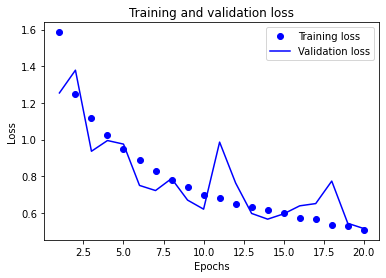

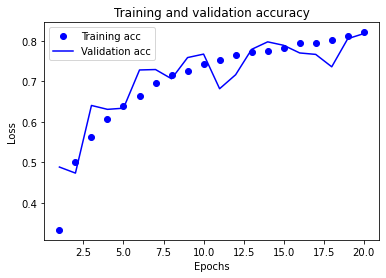

In [32]:
plot_model(history_n_model_2)

In [24]:
n_model_2 = keras.models.Sequential([  
                                keras.layers.Conv2D(32, kernel_size= (3, 3), padding= 'same', 
                                                     activation= 'relu'), 
                                 keras.layers.MaxPooling2D(pool_size= (2, 2)), 
                               
                                keras.layers.Conv2D(64, kernel_size= (3, 3), 
                                                     padding= 'same', activation= 'relu'), 

                                 keras.layers.MaxPooling2D(pool_size= (2, 2)), 
  
                                 keras.layers.Conv2D(128, kernel_size= (3, 3), 
                                                     padding= 'same', activation= 'relu'),
                                keras.layers.MaxPooling2D(pool_size= (2, 2)),
                                keras.layers.Dropout(0.3),
                                 keras.layers.Conv2D(128, kernel_size= (3, 3), padding= 'same', 
                                                     activation= 'relu'), 
                                 keras.layers.MaxPooling2D(pool_size= (2, 2)),
                                 keras.layers.Dropout(0.3),

                                 keras.layers.Flatten(),
                                keras.layers.Dropout(0.5), 
                                
                                 keras.layers.Dense(512, activation= 'relu'), 
                                keras.layers.Dropout(0.5), 
                                
                                 keras.layers.Dense(100, activation= 'relu'),
 
                                 keras.layers.Dense(num_categories, activation = 'softmax')
])
n_model_2.compile(loss= 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy']) #change adam

In [25]:
history_n_model_2 = n_model_2.fit(
    x_train,
    y_train,
    epochs=20,
    batch_size=128,
    shuffle=True,
    validation_data=(x_val, y_val),
)

Epoch 1/20
88/88 [==============================] - 38s 360ms/step - loss: 1.7127 - accuracy: 0.2532 - val_loss: 1.2544 - val_accuracy: 0.4882
Epoch 2/20
88/88 [==============================] - 46s 521ms/step - loss: 1.2836 - accuracy: 0.4830 - val_loss: 1.3785 - val_accuracy: 0.4733
Epoch 3/20
88/88 [==============================] - 45s 516ms/step - loss: 1.1429 - accuracy: 0.5550 - val_loss: 0.9361 - val_accuracy: 0.6405
Epoch 4/20
88/88 [==============================] - 46s 524ms/step - loss: 1.0251 - accuracy: 0.6061 - val_loss: 0.9946 - val_accuracy: 0.6309
Epoch 5/20
88/88 [==============================] - 48s 542ms/step - loss: 0.9769 - accuracy: 0.6296 - val_loss: 0.9751 - val_accuracy: 0.6337
Epoch 6/20
88/88 [==============================] - 47s 534ms/step - loss: 0.8946 - accuracy: 0.6638 - val_loss: 0.7496 - val_accuracy: 0.7282
Epoch 7/20
88/88 [==============================] - 46s 524ms/step - loss: 0.8276 - accuracy: 0.6948 - val_loss: 0.7217 - val_accuracy: 0.7293

### Original model path:                    "/guided-retraining/models/intel_model_21_10"

In [28]:
n_model_2.evaluate(x_test,y_test)

94/94 [==============================] - 4s 46ms/step - loss: 0.5392 - accuracy: 0.8037


[0.5391883850097656, 0.8036666512489319]

In [37]:
n_model_2.save("C:/Users/fjdur/Desktop/upc/project_notebooks/github_project/DL_notebooks/models/intel_model_21_10")

INFO:tensorflow:Assets written to: C:/Users/fjdur/Desktop/upc/project_notebooks/github_project/DL_notebooks/models/intel_model_21_10\assets
